# Đồ án cuối kỳ môn: Lập trình cho khoa học dữ liệu

## Danh sách thành viên

| MSSV  | Họ tên  | Tài khoản github  |
|:------|:--------|:------------------|
1712770| Trương Thị Lệ Thanh  |thanhtruong1712|
1712771|  Bùi Thái Tấn Thành  |thanhtan0501|

## Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings('ignore')

## Thu thập dữ liệu

Bộ dữ liệu cung cấp thông tin về tổng số ca mắc, tử vong và hồi phục do tác động của dịch COVID-19 từ các quốc gia trên thế giới
- Nguồn dữ liệu: https://www.kaggle.com/imdevskp/corona-virus-report

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
df = pd.read_csv("Data/covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### Số dòng và số cột của dữ liệu

Số dòng và số cột của dữ liệu sẽ được tính và lưu vào hai biến `num_rows` và `num_cols`.

In [3]:
num_rows, num_cols = df.shape
print("Dữ liệu có {} dòng và {} cột".format(num_rows, num_cols))

Dữ liệu có 49068 dòng và 10 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng mang thông tin về các trường hợp COVID-19 đã được xác nhận, tử vong và đã phục hồi từ các quốc gia khác nhau kể từ ngày 22/01/2020 đến ngày 27/07/2020
- Có vẻ không có dòng nào có ý nghĩa khác so với các dòng còn lại.

### Dữ liệu có các dòng bị lặp không?

In [4]:
print("Dữ liệu có số dòng bị lặp: {}".format(df.duplicated().sum()))

Dữ liệu có số dòng bị lặp: 0


### Mỗi cột có ý nghĩa gì?

- Province/State: Tỉnh hoặc bang của quốc gia
- Country/Region: Quốc gia hoặc vùng lãnh thổ
- Lat: vĩ độ của vị trí đó
- Long: kinh độ của vị trí đó
- Date: Ngày được báo cáo
- Confirmed: Tổng số ca nhiễm đã được xác nhận cho đến ngày được báo cáo
- Deaths: Tổng số ca tử vong cho đến ngày được báo cáo
- Recovered: Tổng số ca hồi phục cho đến ngày được báo cáo
- Active: Tổng số ca mắc còn lại cho đến ngày được báo cáo
- WHO Region: Khu vực WHO phụ trách

### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [5]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

Ta thấy cột `Date` có kiểu dữ liệu là `object`, vì vậy ta phải chuyển kiểu dữ liệu của cột `Date` từ `object` sang `datetime`

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")

In [7]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ xếp cột datetime vào nhóm numeric luôn. Hiện có 7 cột có vẻ là thuộc nhóm numeric: "Lat", "Long", "Date", "Confirmed", "Deaths", "Recovered", "Active".

In [9]:
nume_df = df[["Lat", "Long", "Date", "Confirmed", "Deaths", "Recovered", "Active"]]
def missing_ratio(s):
    return s.isna().mean() * 100
nume_col_profiles_df = nume_df.agg([missing_ratio, min, max])
nume_col_profiles_df

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
missing_ratio,0.0000,0.000,0.0,0.0,0.0,0.0,0.0
min,-51.7963,-135.000,2020-01-22 00:00:00,0.0,0.0,0.0,-14.0
max,71.7069,178.065,2020-07-27 00:00:00,4290259.0,148011.0,1846641.0,2816444.0


Ta thấy không có giá trị thiếu. Cột `Active` có giá trị min là số âm ==> Cột `Active` có giá trị bất thường. Ta xét giá trị của cột `Active` <0

In [10]:
df[df['Active']<0]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
16238,Hainan,China,19.195900,109.745300,2020-03-24,168,6,168,-6,Western Pacific
16499,Hainan,China,19.195900,109.745300,2020-03-25,168,6,168,-6,Western Pacific
16760,Hainan,China,19.195900,109.745300,2020-03-26,168,6,168,-6,Western Pacific
17021,Hainan,China,19.195900,109.745300,2020-03-27,168,6,168,-6,Western Pacific
17282,Hainan,China,19.195900,109.745300,2020-03-28,168,6,168,-6,Western Pacific
17543,Hainan,China,19.195900,109.745300,2020-03-29,168,6,168,-6,Western Pacific
17804,Hainan,China,19.195900,109.745300,2020-03-30,168,6,168,-6,Western Pacific
18065,Hainan,China,19.195900,109.745300,2020-03-31,168,6,168,-6,Western Pacific
18326,Hainan,China,19.195900,109.745300,2020-04-01,168,6,168,-6,Western Pacific
32059,Channel Islands,United Kingdom,49.372300,-2.364400,2020-05-23,558,45,515,-2,Europe


Nhìn vào dữ ta thấy cột `Recovered` có giá trị >= cột `Confirmed` trong khi cột `Deaths` lại có giá trị >=0 nên giá trị cột `Active` có giá trị âm. Ta thực hiện tiền xử lý chuyển giá trị âm thành 0

In [11]:
df['Active'][df['Active']<0]=0

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

Hiện có 3 cột thuộc nhóm categorical: "Province/State", "Country/Region", "WHO Region"

In [12]:
cate_df= df[["Province/State", "Country/Region", "WHO Region"]]
def num_diff_vals(s):
    return s.drop_duplicates().count()
def diff_vals(s):
    return dict(s.value_counts())
cate_col_profiles_df = cate_df.agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,Province/State,Country/Region,WHO Region
missing_ratio,70.114943,0.0,0.0
num_diff_vals,78,187,6
diff_vals,"{'Mayotte': 188, 'Guangdong': 188, 'Manitoba':...","{'China': 6204, 'Canada': 2256, 'France': 2068...","{'Europe': 15040, 'Western Pacific': 10340, 'A..."


Ta thấy cột `Province/State` có giá trị NaN với tỉ lệ rất cao. Ta thực hiện tiền xử lý thay thế bằng giá trị 'Unknown'

In [13]:
df.isnull().sum()
df['Province/State'].fillna('Unknown',inplace = True)
df


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Unknown,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Unknown,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Unknown,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Unknown,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## Đưa ra câu hỏi cần trả lời

### 1. Top 10 quốc gia có số ca nhiễm cao nhất thế giới ? 

Trả lời được câu hỏi này, ta sẽ biết được tình hình kiểm soát dịch của các quốc gia trên thế giới như thế nào.

#### Phân tích dữ liệu để trả lời cho câu hỏi

- Bước 1 : Lọc ra dữ liệu gồm những dòng có cột `Date` là ngày cuối cùng thu thập dữ liệu (2020-07-27)
- Bước 2 : Gom nhóm theo cột `Country/Region` và dùng hàm `sum` để lấy ra tổng số ca nhiễm của các quốc gia có trong bộ dữ liệu
- Bước 3 : Sử dụng hàm `sort_value` theo cột `Confirmed` đã tính được từ bước 2
- Bước 4 : Lấy 10 dòng đầu tiên của dữ liệu thu được ở bước 3
- Bước 5 : Vẽ biểu đồ thể hiện top 10 quốc gia có số ca nhiễm COVID nhiều nhất thế giới

In [14]:
d= df.loc[df['Date'] == df['Date'].max()]
top_country = d.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10).reset_index()
top_country

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


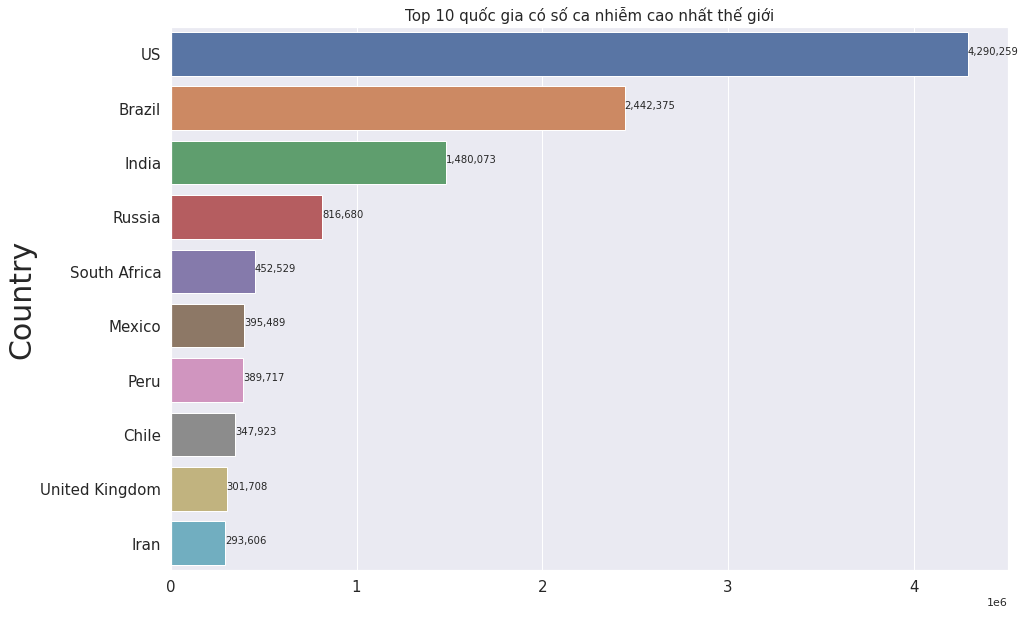

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_country['Confirmed'],
                 y=top_country['Country/Region'])

for i, (value, name) in enumerate(zip(top_country['Confirmed'], top_country['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(' ', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 quốc gia có số ca nhiễm cao nhất thế giới', fontsize=15);

Từ biểu đồ ta thấy top 10 quốc gia có số ca mắc không đồng đều. Nước Mỹ có số ca nhiễm COVID cao khủng khiếp, gần gấp đôi so với Brazil - nước có số ca mắc nhiều thứ 2 thế giới

### 2. Mỗi tháng, số ca tử vong của quốc gia nào cao nhất?

Trả lời được câu hỏi này, ta sẽ biết được khả năng phòng chống dịch của một quốc gia có tốt hay không , các biện pháp hỗ trợ người dân khi bị mắc COVID-19 có đầy đủ hay không?

#### Tiền xử lý


Do dữ liệu số người chết của mỗi quốc gia được cộng dồn theo từng ngày nên ta lấy giá trị số người chết vào ngày cuối mỗi tháng để xác định số ca tử vong của mỗi quốc gia vào tháng đó

##### Tạo dataframe tổng số người chết của mỗi quốc gia theo mỗi tháng

- Bước 1 : Lấy ngày cuối cùng của mỗi tháng(từ tháng 1 đến tháng 7) trong dữ liệu đang xét
- Bước 2 : Tính tổng số người chết của các tỉnh/bang của mỗi quốc gia vào ngày cuối tháng. Sau đó lưu vào dataframe d
- Bước 3 : Thêm cột "Month" vào dataframe d
- Bước 4 : Xác định khoảng thời gian thu thập dữ liệu của dataframe và miền giá trị của cột "Month"

In [17]:
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  
    return next_month - datetime.timedelta(days=next_month.day)
last_day=[]
for month in range(1, 7):
    last_day.append(last_day_of_month(datetime.date(2020, month, 1)))
last_day.append(datetime.date(2020, 7, 27))

In [18]:
df_month = df[df['Date'].isin(last_day)]
d= df_month.groupby(["Country/Region","Date"])["Deaths"].sum().reset_index()
start_deaths=d['Deaths'][0::7]
d['Deaths']=d['Deaths']-d['Deaths'].shift(1)
d['Deaths'][0::7]= start_deaths
d

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-31,0.0
1,Afghanistan,2020-02-29,0.0
2,Afghanistan,2020-03-31,4.0
3,Afghanistan,2020-04-30,60.0
4,Afghanistan,2020-05-31,193.0
...,...,...,...
1304,Zimbabwe,2020-03-31,1.0
1305,Zimbabwe,2020-04-30,3.0
1306,Zimbabwe,2020-05-31,0.0
1307,Zimbabwe,2020-06-30,3.0


In [19]:
d['Month'] = pd.DatetimeIndex(d['Date']).month
d.head(10)

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-31,0.0,1
1,Afghanistan,2020-02-29,0.0,2
2,Afghanistan,2020-03-31,4.0,3
3,Afghanistan,2020-04-30,60.0,4
4,Afghanistan,2020-05-31,193.0,5
5,Afghanistan,2020-06-30,489.0,6
6,Afghanistan,2020-07-27,523.0,7
7,Albania,2020-01-31,0.0,1
8,Albania,2020-02-29,0.0,2
9,Albania,2020-03-31,15.0,3


In [20]:
range_time = df['Date'].value_counts().sort_index()
range_month = pd.DataFrame({'Date':[range_time.index[0], range_time.index[-1]]},index=['Min','Max'])
month_range = d['Month'].value_counts().sort_index()
range_month = range_month.join(pd.DataFrame({'Month': [month_range.index[0],
                                                         month_range.index[-1]]}, 
                                              index=['Min', 'Max']))

#### Phân tích dữ liệu để trả lời cho câu hỏi

- Bước 1 : Lấy ra dữ liệu gồm các cột 'Month','Country/Region','Deaths' của dataframe d rồi gom nhóm 2 cột 'Month','Country/Region' và lấy max
- Bước 2 : Với mỗi tháng, tìm xem quốc gia nào có số người chết cao nhất và đưa vào dictionary `max_deaths`

In [22]:
a= d[['Month','Country/Region','Deaths']].groupby(['Month','Country/Region']).max()

max_deaths = {}
for i in range(range_month.loc['Min','Month'], range_month.loc['Max','Month']+1):
    death_month = a.loc[i]
    for j in death_month.index:
        if death_month.loc[j,'Deaths']==death_month['Deaths'].max():
            max_deaths[i]={j:death_month.loc[j,'Deaths']}
            break
max_deaths

{1: {'China': 213.0},
 2: {'China': 2624.0},
 3: {'Italy': 12399.0},
 4: {'US': 58651.0},
 5: {'US': 41108.0},
 6: {'Brazil': 30280.0},
 7: {'Brazil': 28024.0}}

## Nhìn lại quá trình làm đồ án

### Khó khăn:
- Trong quá trình trả lời câu hỏi, có một vài dữ liệu cần phải xử lý bằng nhiều hàm mới có dữ liệu chính xác. Ví dụ số ca nhiễm COVID ở cột Confirmed được cộng dồn qua từng ngày...
- Dữ liệu số người chết được cộng dồn theo từng ngày nên cần xử lý bằng nhiều hàm để tính toán được số người chết mỗi tháng

### Đã học được những gì?
- Biết thêm nhiều cách vẽ biểu đồ thông qua thư viện matplotlib
- Nâng cao kỹ năng sử dụng thư viện datetime

### Có thêm thời gian thì sẽ làm gì?
- Nhóm sẽ đặt thêm vài câu hỏi có mức độ thử thách cao hơn và giải quyết chúng

## Tài liệu tham khảo
- https://stackoverflow.com/
- https://www.kaggle.com/imdevskp/corona-virus-report
- https://qastack.vn/programming/